# **Importing the dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("georgejdinicola/world-bank-indicators")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-bank-indicators


# **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Load dataset**

In [ ]:
# Load dataset
df = pd.read_csv('/kaggle/input/world-bank-indicators/world_bank_indicators.csv')  # Update if needed

# **Target and cleanup**

In [ ]:
# Target and cleanup
target_column = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
df = df.dropna(subset=[target_column])

# **Convert target to classification: Low, Medium, High**

In [ ]:
# Convert target to classification: Low, Medium, High
def classify_unemployment(rate):
    if rate < 5:
        return 'Low'
    elif rate < 10:
        return 'Medium'
    else:
        return 'High'

df['Unemployment_Class'] = df[target_column].apply(classify_unemployment)

# **Preprocessing**

In [ ]:
# Preprocessing
df = df.drop(columns=['updated_at', 'year', target_column])

# **Encode 'country'**

In [ ]:
# Encode 'country'
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

#**Drop high-null columns**

In [ ]:
# Drop high-null columns
df = df.loc[:, df.isnull().mean() < 0.5]

# **Fill missing values**

In [ ]:
# Fill missing values
df = df.fillna(df.mean(numeric_only=True))

# **Split features and target**

In [ ]:
# Split features and target
X = df.drop(columns=['Unemployment_Class'])
y = df['Unemployment_Class']

# **Scale features**

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train/test split**

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **Model training with hyperparameter tuning**

In [ ]:
# Model training with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

# **Best model**

In [ ]:
# Best model
model = grid.best_estimator_

# **Predict and evaluate**

Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.98       417
         Low       0.97      0.97      0.97       556
      Medium       0.96      0.97      0.96       578

    accuracy                           0.97      1551
   macro avg       0.97      0.97      0.97      1551
weighted avg       0.97      0.97      0.97      1551

Confusion Matrix:



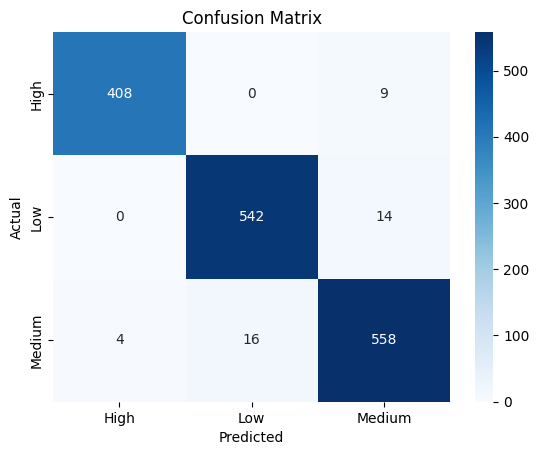

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Best Parameters: {grid.best_params_}")